In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
    

In [2]:
data = pd.read_csv("C:/Users/USER/Desktop/Ml/datasets/X_Y_Sinusoid_Data.csv")

In [3]:
data.head()

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


In [5]:
X_real = np.linspace(0,1,100)
Y_real = np.sin(2*np.pi*X_real)

In [6]:
print(data.shape)
print(X_real.shape)
print(Y_real.shape)


(20, 2)
(100,)
(100,)


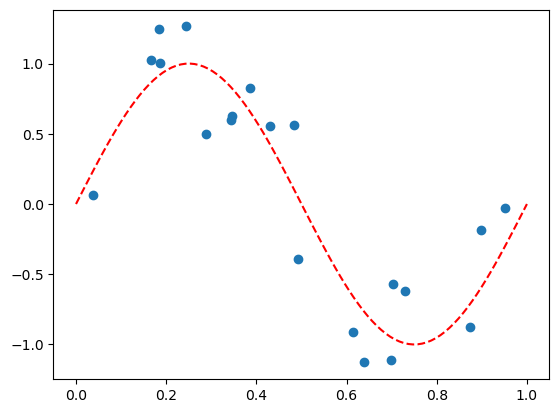

In [7]:
plt.scatter(data['x'],data['y'])
plt.plot(X_real,Y_real,ls='--',color='r',label='real function')
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degree = 20

pf = PolynomialFeatures(degree)
lr = LinearRegression()

In [11]:
X = data[['x']]
y = data[['y']]

In [12]:
X_poly = pf.fit_transform(X)

In [13]:
lr.fit(X_poly,y)

LinearRegression()

In [14]:
pred = lr.predict(X_poly)

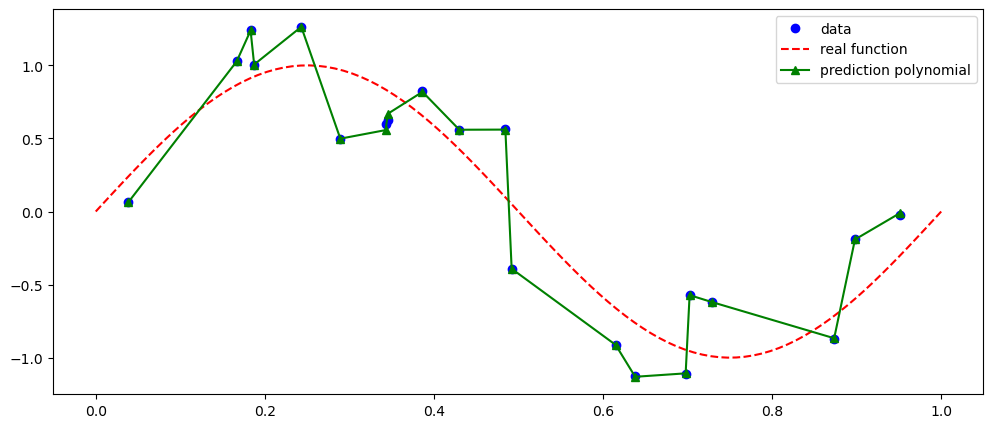

In [20]:
plt.figure(figsize=(12,5))
plt.plot(X,y,marker='o',ls='',color='b',label='data',alpha=1)
plt.plot(X_real,Y_real,ls='--',color='r',label='real function',alpha=1)
plt.plot(X,pred,marker='^',ls='-',color='g',label='prediction polynomial',alpha=1)
plt.legend()
plt.show()

In [21]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

rr = Ridge(alpha=0.0001)
rr.fit(X_poly,y)
pred_rr = rr.predict(X_poly)

ls = Lasso(alpha=0.0001)
ls.fit(X_poly,y)
pred_ls = ls.predict(X_poly)

en = ElasticNet(alpha=0.0001, l1_ratio = 0.5)
en.fit(X_poly,y)
pred_en = en.predict(X_poly)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.470e-01, tolerance: 1.223e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.108e-01, tolerance: 1.223e-03
  model = cd_fast.enet_coordinate_descent(


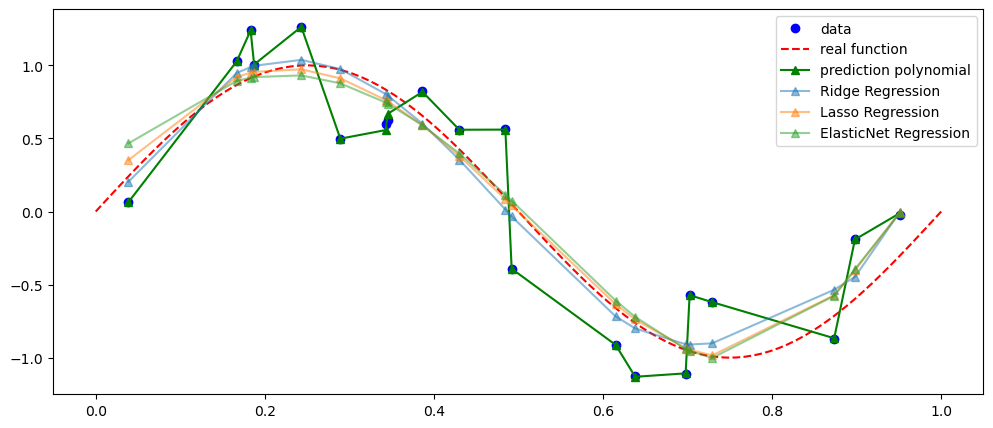

In [27]:
plt.figure(figsize=(12,5))
plt.plot(X,y,marker='o',ls='',color='b',label='data',alpha=1)
plt.plot(X_real,Y_real,ls='--',color='r',label='real function',alpha=1)
plt.plot(X,pred,marker='^',ls='-',color='g',label='prediction polynomial')

plt.plot(X,pred_rr,marker='^',ls='-',label='Ridge Regression',alpha=0.5)
plt.plot(X,pred_ls,marker='^',ls='-',label='Lasso Regression',alpha=0.5)
plt.plot(X,pred_en,marker='^',ls='-',label='ElasticNet Regression',alpha=0.5)

plt.legend()
plt.show()

In [35]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X= data.data
y = data.target

In [36]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X,y)

pred = knn.predict(X)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [38]:
from sklearn.metrics import accuracy_score

accuracy_score(y,pred)

1.0

In [39]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(x_train,y_train)

pred = knn.predict(x_test)

accuracy_score(y_test,pred)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9298245614035088

In [43]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [44]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)

(364, 30)
(364,)
(91, 30)
(91,)
(114, 30)
(114,)


In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(x_train,y_train)

pred = knn.predict(x_train)
print("Tranning accuracy: ",accuracy_score(y_train,pred))

pred = knn.predict(x_valid)
print("Validation accuracy: ",accuracy_score(y_valid,pred))

pred = knn.predict(x_test)
print("Testing accuracy: ",accuracy_score(y_test,pred))


Tranning accuracy:  1.0
Validation accuracy:  0.9010989010989011
Testing accuracy:  0.9298245614035088


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [48]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors =1)

scores = cross_val_score(knn,X,y,cv=5)

print(scores)

[0.85964912 0.92982456 0.9122807  0.9122807  0.91150442]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [49]:
scores.mean()

0.9051079024996118

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators':[10,20,30],
         'max_depth':[3,5,7,9],
         'max_features':[0.5,0.7,1.0]}

rf = RandomForestClassifier()

clf = GridSearchCV(rf,params,cv=5)

clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'max_features': [0.5, 0.7, 1.0],
                         'n_estimators': [10, 20, 30]})

In [61]:
clf.best_params_

{'max_depth': 7, 'max_features': 0.5, 'n_estimators': 30}

In [55]:
pred = clf.predict(x_train)
print("Tranning accuracy: ",accuracy_score(y_train,pred))

pred = clf.predict(x_valid)
print("Validation accuracy: ",accuracy_score(y_valid,pred))

pred = clf.predict(x_test)
print("Testing accuracy: ",accuracy_score(y_test,pred))

Tranning accuracy:  1.0
Validation accuracy:  0.9120879120879121
Testing accuracy:  0.9649122807017544
